# 1. Preliminary Analysis

## Loading Dataset

In [1]:
import csv
import pandas as pd
import numpy as np
import re
import plotly.express as px

In [2]:
path_train = 'data/sts-train.csv'
path_dev = 'data/sts-dev.csv'
path_test = 'data/sts-test.csv'

In [3]:
columns=['genre', 'file', 'year', 'index', 'score', 'sentence1', 'sentence2']

In [4]:
df_train = pd.read_csv(path_train, sep='\t', usecols=range(7), header=None, quoting=csv.QUOTE_NONE, names=columns, encoding='UTF-8')
df_dev = pd.read_csv(path_dev, sep='\t', usecols=range(7), header=None, quoting=csv.QUOTE_NONE, names=columns, encoding='UTF-8')
df_test = pd.read_csv(path_test, sep='\t', usecols=range(7), header=None, quoting=csv.QUOTE_NONE, names=columns, encoding='UTF-8')

In [5]:
df = pd.concat([df_train, df_dev, df_test]).reset_index(drop=True)
df

,genre,file,year,index,score,sentence1,sentence2
0,main-captions,MSRvid,2012test,1,5.00,A plane is taking off.,An air plane is taking off.
1,main-captions,MSRvid,2012test,4,3.80,A man is playing a large flute.,A man is playing a flute.
2,main-captions,MSRvid,2012test,5,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,main-captions,MSRvid,2012test,6,2.60,Three men are playing chess.,Two men are playing chess.
4,main-captions,MSRvid,2012test,9,4.25,A man is playing the cello.,A man seated is playing the cello.
...,...,...,...,...,...,...,...
8623,main-news,headlines,2016,1354,0.00,"Philippines, Canada pledge to further boost re...",Philippines saves 100 after ferry sinks
8624,main-news,headlines,2016,1360,1.00,Israel bars Palestinians from Jerusalem's Old ...,"Two-state solution between Palestinians, Israe..."
8625,main-news,headlines,2016,1368,1.00,How much do you know about Secret Service?,Lawmakers from both sides express outrage at S...
8626,main-news,headlines,2016,1420,0.00,Obama Struggles to Soothe Saudi Fears As Iran ...,Myanmar Struggles to Finalize Voter Lists for ...


## Dataset description
Composed of 3 sets of data:
- train
- dev
- test

The dataset contains sentences coming from 3 type of sources:
- captions
- news
- forums

Each row of the dataset contains (only relevant columns are mentioned here):
- genre: the type of the source
- year
- a pair of sentences to be compared on similarity
- score: a human made index of the similarity of the two sentences

In [6]:
print(f'Number of rows (2 sentences per row): {len(df)}')
print(f'Total number of sentences: {len(df)*2}')

Number of rows (2 sentences per row): 8628
Total number of sentences: 17256


## Data cleaning

Check for the presence of null values:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   genre      8628 non-null   object 
 1   file       8628 non-null   object 
 2   year       8628 non-null   object 
 3   index      8628 non-null   int64  
 4   score      8628 non-null   float64
 5   sentence1  8628 non-null   object 
 6   sentence2  8628 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 472.0+ KB


There are no null values.

In [8]:
df['genre'].value_counts()

genre
main-news        4299
main-captions    3250
main-forums       629
main-forum        450
Name: count, dtype: int64

In [9]:
df['genre'] = df['genre'].replace('main-', '', regex=True)
df['genre'] = df['genre'].replace('forum', 'forums')

In [10]:
df['genre'].value_counts()

genre
news        4299
captions    3250
forums      1079
Name: count, dtype: int64

In [11]:
# Remove everything in this column which is not a number
df['year'] = df['year'].replace(r'\D', '', regex=True)

MinMax scaling through scikit-learn:

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['score'] = scaler.fit_transform(df[['score']])

In [13]:
df['score'].describe()

count    8628.000000
mean        0.525504
std         0.297152
min         0.000000
25%         0.280000
50%         0.560000
75%         0.760000
max         1.000000
Name: score, dtype: float64

In [14]:
df

,genre,file,year,index,score,sentence1,sentence2
0,captions,MSRvid,2012,1,1.00,A plane is taking off.,An air plane is taking off.
1,captions,MSRvid,2012,4,0.76,A man is playing a large flute.,A man is playing a flute.
2,captions,MSRvid,2012,5,0.76,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,captions,MSRvid,2012,6,0.52,Three men are playing chess.,Two men are playing chess.
4,captions,MSRvid,2012,9,0.85,A man is playing the cello.,A man seated is playing the cello.
...,...,...,...,...,...,...,...
8623,news,headlines,2016,1354,0.00,"Philippines, Canada pledge to further boost re...",Philippines saves 100 after ferry sinks
8624,news,headlines,2016,1360,0.20,Israel bars Palestinians from Jerusalem's Old ...,"Two-state solution between Palestinians, Israe..."
8625,news,headlines,2016,1368,0.20,How much do you know about Secret Service?,Lawmakers from both sides express outrage at S...
8626,news,headlines,2016,1420,0.00,Obama Struggles to Soothe Saudi Fears As Iran ...,Myanmar Struggles to Finalize Voter Lists for ...


## Vocabulary Investigation

In [15]:
print(f'Total number of sentence pairs: {len(df)}')

Total number of sentence pairs: 8628


In [16]:
s1_len = df['sentence1'].apply(lambda x : len(str(x)))
s2_len = df['sentence2'].apply(lambda x : len(str(x)))

Average number of characters per sentence

In [17]:
avg_s1_len = s1_len.mean()
avg_s2_len = s2_len.mean()

print(f'Average number of characters of sentences 1: {avg_s1_len}')
print(f'Average number of characters of sentences 2: {avg_s2_len}')

Average number of characters of sentences 1: 58.23528048215113
Average number of characters of sentences 2: 57.9598980064905


**Processing sentences**:
- lowering the text,
- removing punctuation,
- getting the list of words for each sentence

In [18]:
import string

regex = '[' + string.punctuation + ']'

In [19]:
# new dataframe
df_processed = pd.DataFrame(columns=['sentence1', 'sentence2', 'vocab1', 'vocab2'])

# lowercase
df_processed['sentence1'] = df['sentence1'].apply(lambda x : x.lower())
df_processed['sentence2'] = df['sentence2'].apply(lambda x : x.lower())

# removing punctuation, split in words, sort words
df_processed['vocab1'] = df_processed['sentence1'].apply(lambda x: sorted(str(re.sub(regex, '', x)).split()))
df_processed['vocab2'] = df_processed['sentence2'].apply(lambda x: sorted(str(re.sub(regex, '', x)).split()))

Average number of words per sentence:

In [20]:
avg_vocab1_size = df_processed['vocab1'].apply(lambda x: len(x)).mean()
avg_vocab2_size = df_processed['vocab2'].apply(lambda x: len(x)).mean()

print(f'Average number of words per sentence 1: {avg_vocab1_size}')
print(f'Average number of words per sentence 2: {avg_vocab2_size}')

Average number of words per sentence 1: 10.163885025498377
Average number of words per sentence 2: 10.142095503013445


Merging the vocabulary of all sentences (one for sentences 1, one for sentences 2), computing:
- total number of words,
- vocabulary size, i.e. number of different words used

In [21]:
# vocabulary of sentences 1
global_vocab1 = df_processed['vocab1'].sum()
print(f'Total number of words (1): {len(global_vocab1)}')
print(f'Vocabulary size (1): {len(set(global_vocab1))}')

Total number of words (1): 87694
Vocabulary size (1): 12521


In [22]:
#vocabulary of sentences 2
global_vocab2 = df_processed['vocab2'].sum()
print(f'Total number of words (2): {len(global_vocab2)}')
print(f'Vocabulary size (2): {len(set(global_vocab2))}')

Total number of words (2): 87506
Vocabulary size (2): 12514


**Computing words occurrences**

In [23]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

counts1 = nltk.Counter(global_vocab1)
counts2 = nltk.Counter(global_vocab2)

sns.set_theme()

In [24]:
# Considering words with frequency higher than 50
counts1_filtered = dict(filter(lambda x: x[1] > 50, counts1.items()))
counts2_filtered = dict(filter(lambda x: x[1] > 50, counts2.items()))

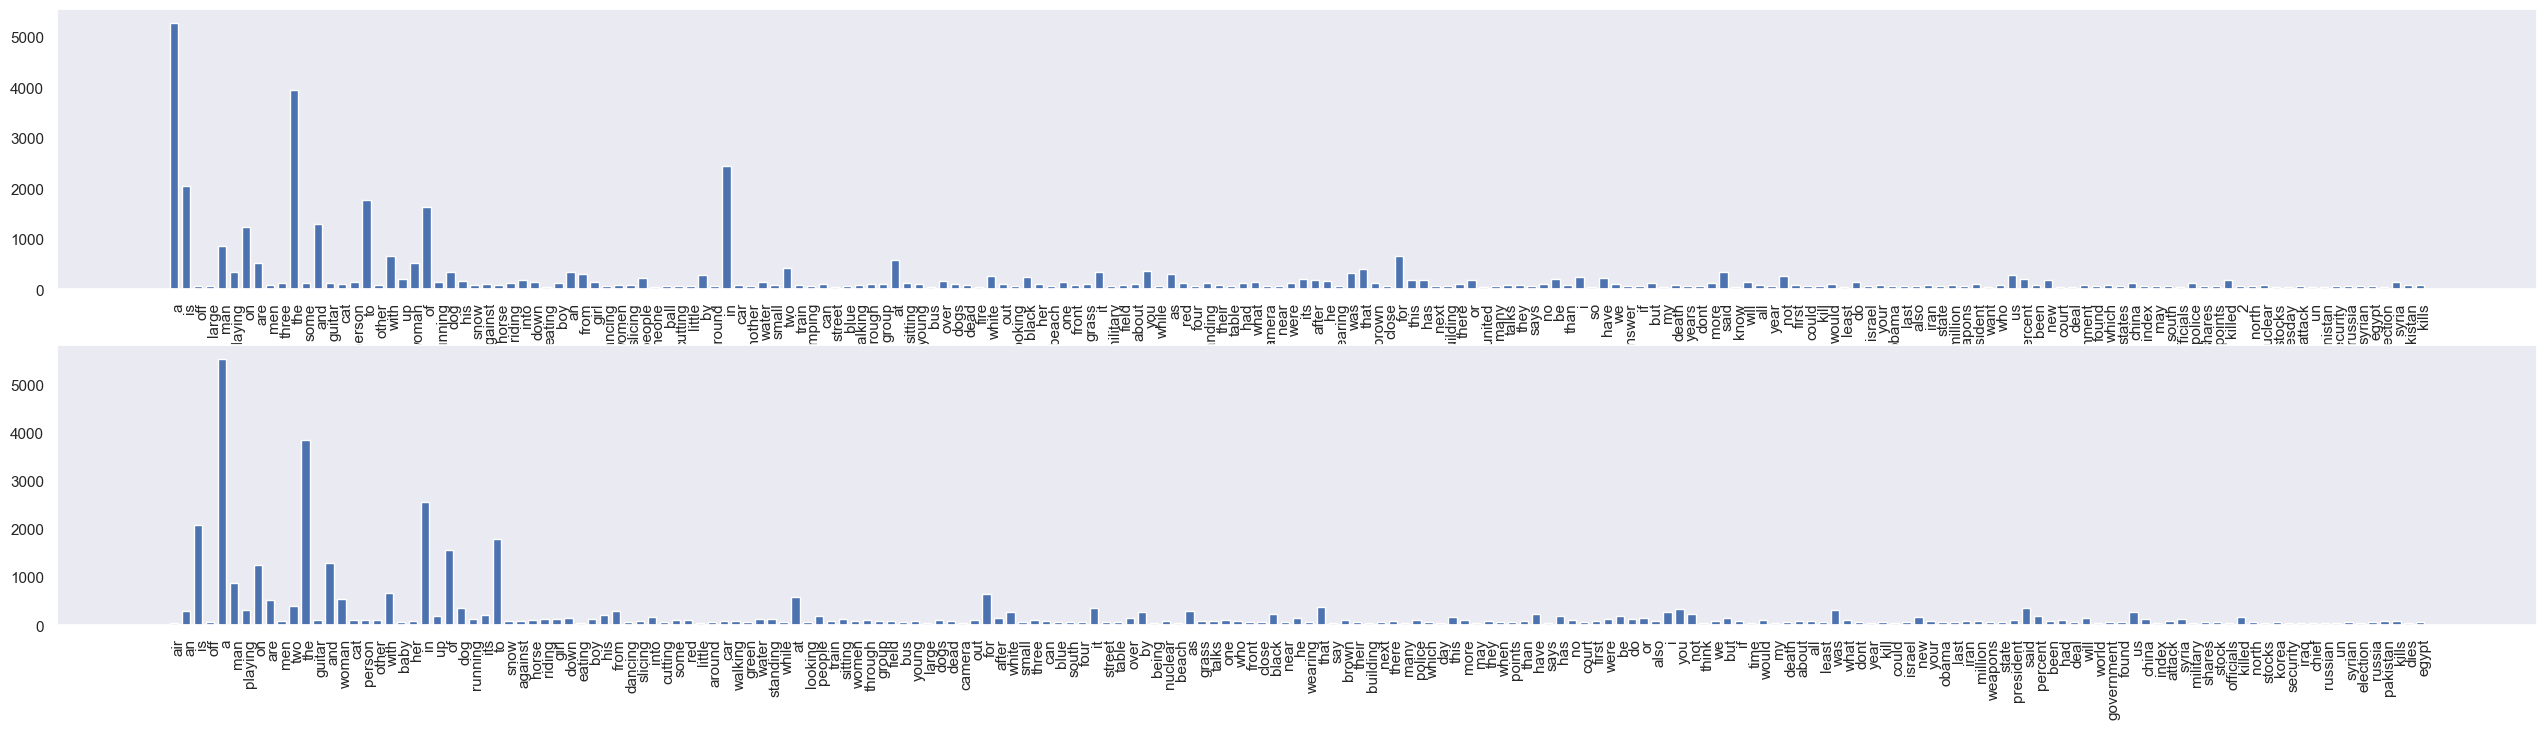

In [25]:
width = 0.7
_, axs = plt.subplots(2, 1, figsize=(32, 8))
axs[0].bar(np.arange(len(counts1_filtered)), counts1_filtered.values(), width)
axs[0].set_xticks(np.arange(len(counts1_filtered)) + width * 0.5, counts1_filtered.keys(), rotation=90)
axs[0].grid(False)

axs[1].bar(np.arange(len(counts2_filtered)), counts2_filtered.values(), width)
axs[1].set_xticks(np.arange(len(counts2_filtered)) + width * 0.5, counts2_filtered.keys(), rotation=90)
axs[1].grid(False)

Stopwords are highly frequent, although they're not very informative.

Words occurrences **removing stopwords**:

In [26]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# vocabulary 1 without stopwords
vocab1_nostop = [w for w in global_vocab1 if w not in stopwords.words('english')]
counts1_nostop = nltk.Counter(vocab1_nostop)

In [28]:
# vocabulary 2 without stopwords
vocab2_nostop = [w for w in global_vocab2 if w not in stopwords.words('english')]
counts2_nostop = nltk.Counter(vocab2_nostop)

In [29]:
# Considering words with frequency higher than 50
counts1_nostop_filtered = dict(filter(lambda x: x[1] > 50, counts1_nostop.items()))
counts2_nostop_filtered = dict(filter(lambda x: x[1] > 50, counts2_nostop.items()))

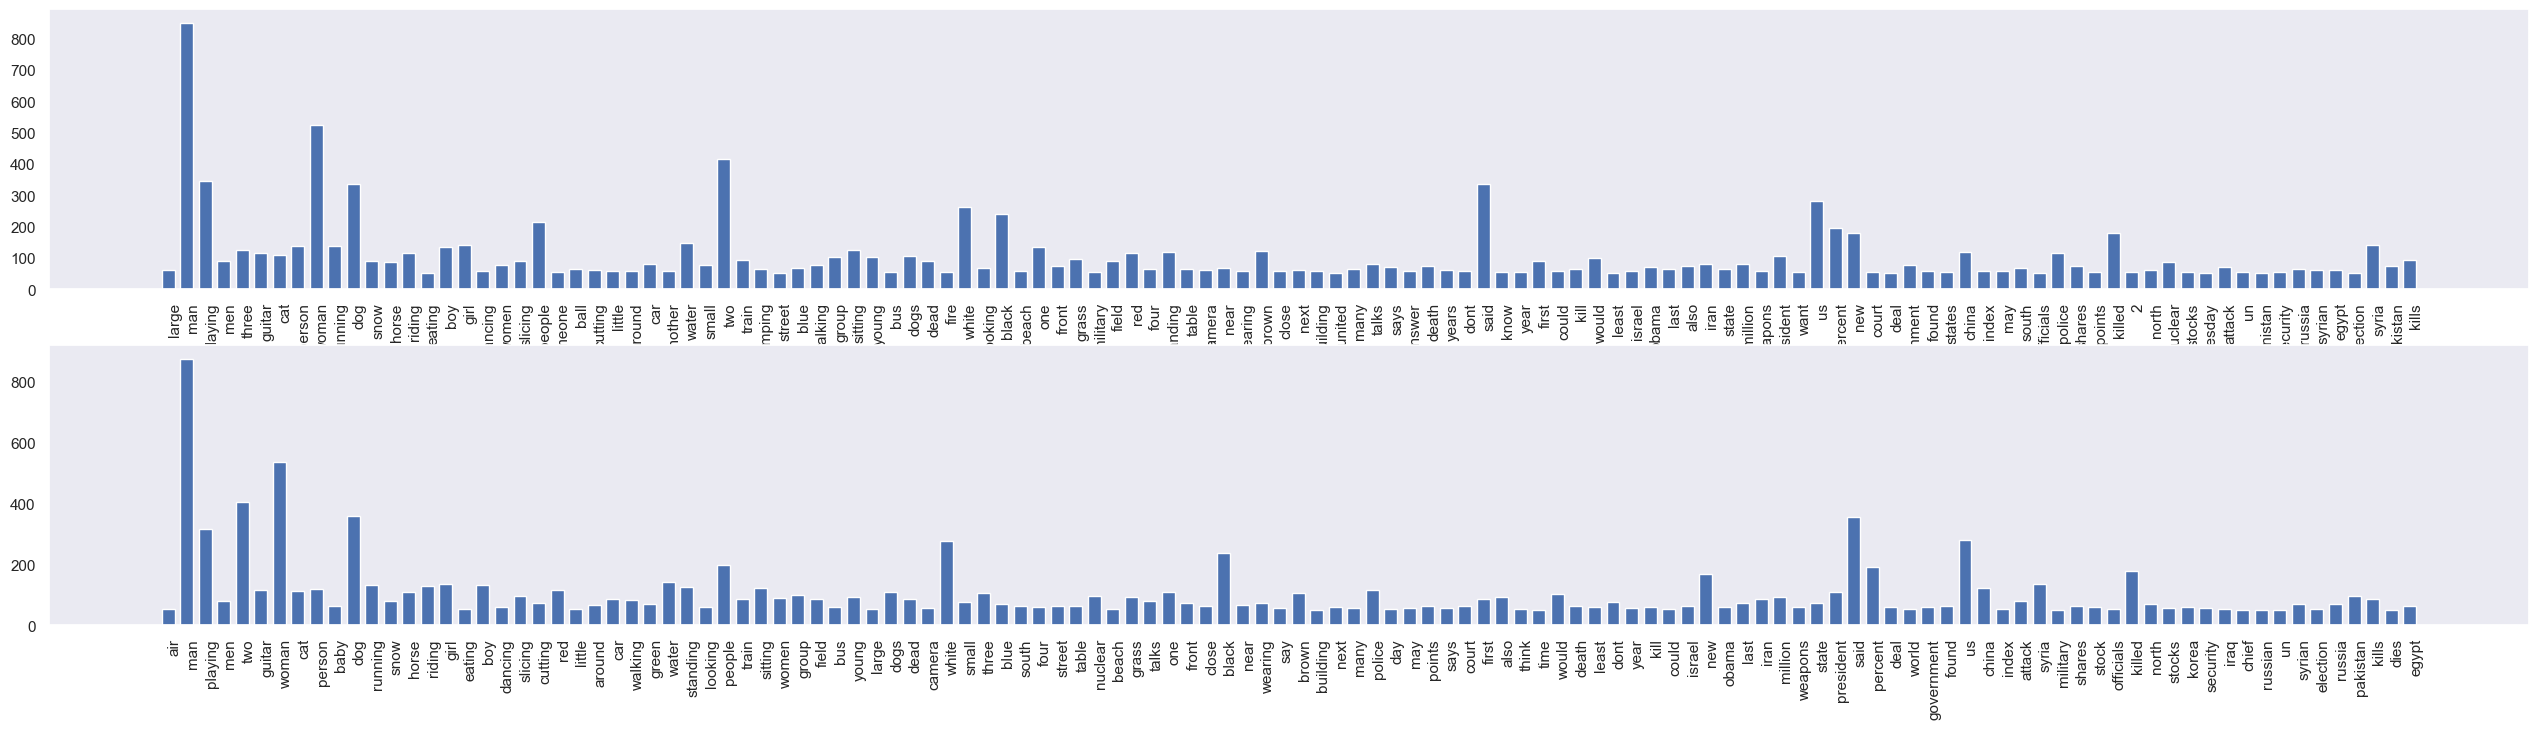

In [30]:
width = 0.7
_, axs = plt.subplots(2, 1, figsize=(32, 8))
axs[0].bar(np.arange(len(counts1_nostop_filtered)), counts1_nostop_filtered.values(), width)
axs[0].set_xticks(np.arange(len(counts1_nostop_filtered)) + width * 0.5, counts1_nostop_filtered.keys(), rotation=90)
axs[0].grid(False)

axs[1].bar(np.arange(len(counts2_nostop_filtered)), counts2_nostop_filtered.values(), width)
axs[1].set_xticks(np.arange(len(counts2_nostop_filtered)) + width * 0.5, counts2_nostop_filtered.keys(), rotation=90)
axs[1].grid(False)

Analysis of **vocabulary on the entire dataset** of sentences

In [31]:
global_vocab = global_vocab1 + global_vocab2
print(f'Total number of words: {len(global_vocab)}')
print(f'Vocabulary size: {len(set(global_vocab))}')

Total number of words: 175200
Vocabulary size: 15914


In [32]:
vocab_nostopwords = [w for w in global_vocab if w not in stopwords.words('english')]
counts_nostopwords = nltk.Counter(vocab_nostopwords)

In [33]:
# Considering words with frequency higher than 50
counts_nostopwords_filtered = dict(filter(lambda x: x[1] > 100, counts_nostopwords.items()))

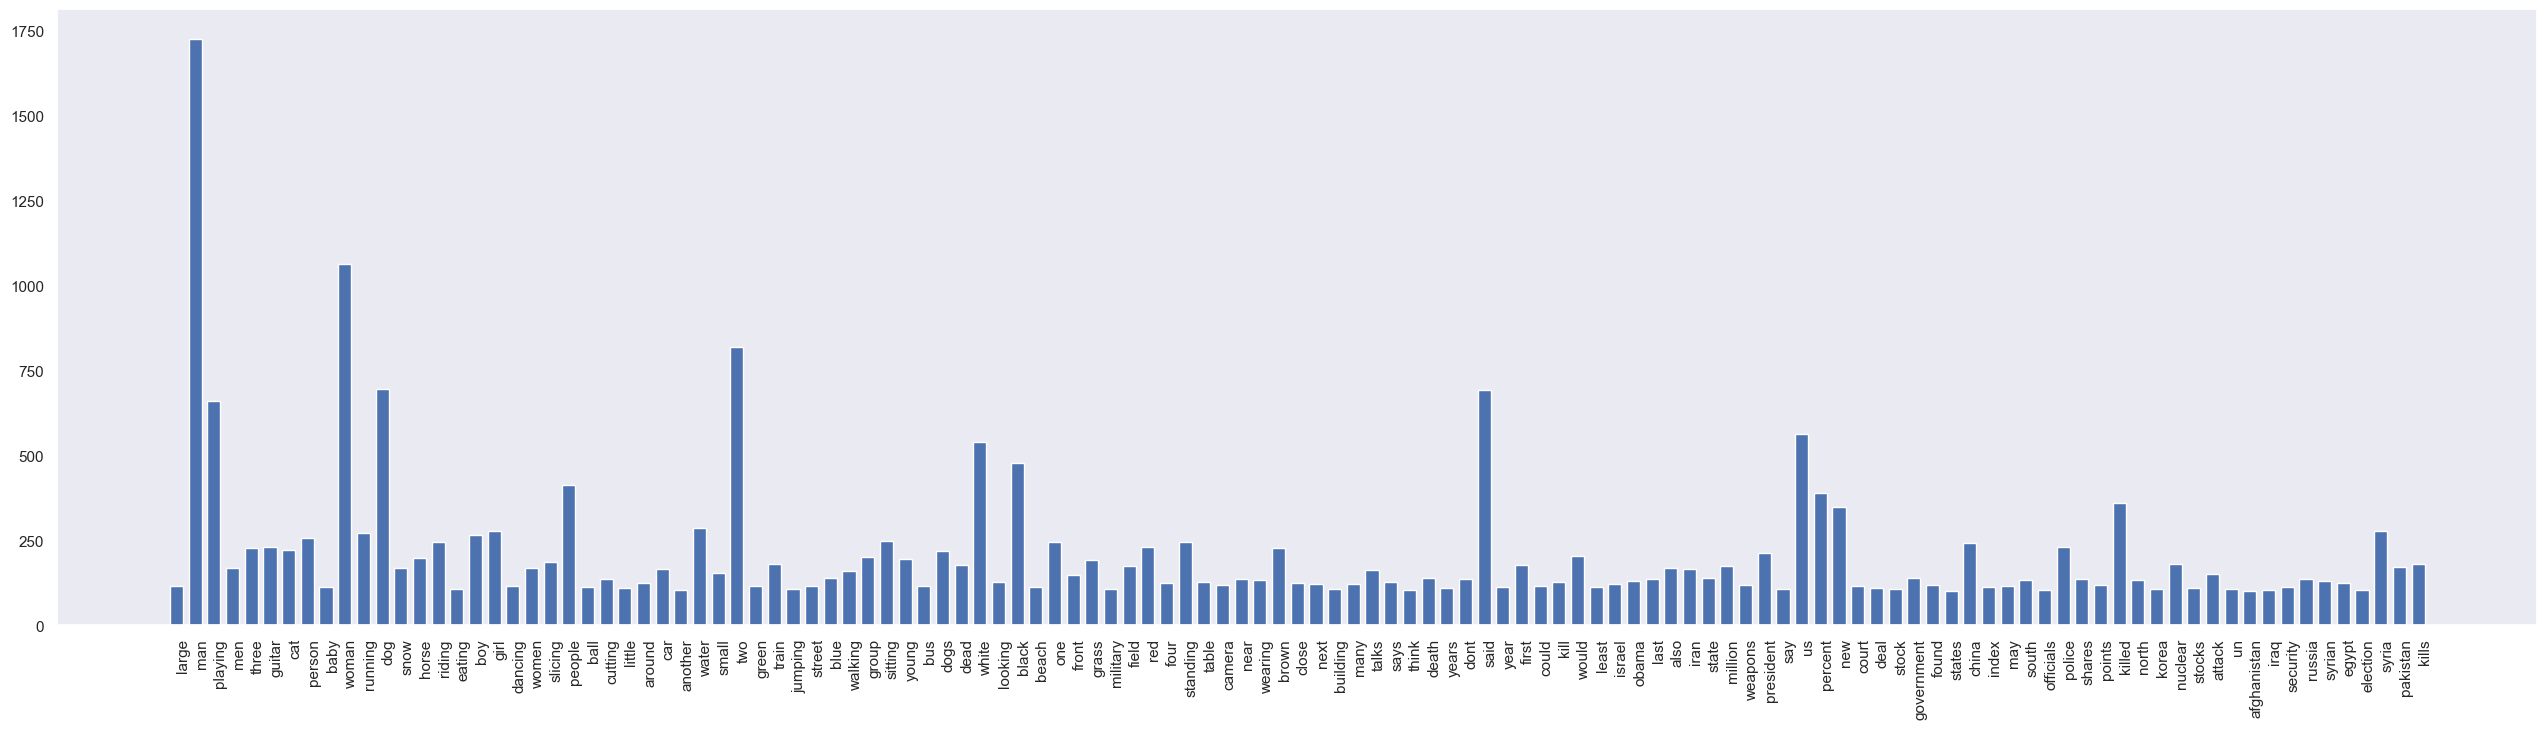

In [34]:
width = 0.7
_, axs = plt.subplots(1, 1, figsize=(32, 8))
axs.bar(np.arange(len(counts_nostopwords_filtered)), counts_nostopwords_filtered.values(), width)
axs.set_xticks(np.arange(len(counts_nostopwords_filtered)) + width * 0.5, counts_nostopwords_filtered.keys(), rotation=90)
axs.grid(False)

## Word embeddings

We will use pre-trained embeddings from the `gensim` library.

In [35]:
import gensim.downloader as api

model = api.load('word2vec-google-news-300')

[====----------------------------------------------] 8.2% 136.1/1662.8MB downloaded

KeyboardInterrupt: 

In [ ]:
print(f"Vocabulary size of the model: {len(model)}")
print(f"Number of dimensions of the embeddings: {model.vector_size}")

Now we select the embeddings for the words in our dataset.

In [ ]:
s1 = df['sentence1'].tolist()
s2 = df['sentence2'].tolist()
sentences = s1 + s2
sentences

In [ ]:
len(sentences), type(s1), type(s1[0])

In [ ]:
# Pre-processing here

In [ ]:
def sentence_to_embedding(sentence: str) -> np.ndarray:
    tokenized_sentences: list[str] = re.sub('\W', ' ', sentence).lower().split()
    tokenized_sentences = [sentence for sentence in tokenized_sentences if len(sentence) > 1]
    embedding = np.zeros(model.vector_size)
    for word in tokenized_sentences:
        if word in model:
            embedding += model[word]
    return embedding / len(sentence)

Build a single embedding for each sentence, by averaging the embeddings of the words in the sentence.

In [ ]:
sentence_embeddings = np.array(list(map(sentence_to_embedding, sentences)))
sentence_embeddings.shape

Visualize sentence embeddings using t-SNE.

In [ ]:
from sklearn.manifold import TSNE

# TODO: iterate more
tsne = TSNE(n_components=3, n_iter=500, n_jobs=-1, verbose=2)
tsne_embedding = tsne.fit_transform(sentence_embeddings)

In [ ]:
x, y, z = np.transpose(tsne_embedding)
x1, y1, z1 = np.transpose(tsne_embedding[:len(df)])
x2, y2, z2 = np.transpose(tsne_embedding[len(df):])

Visualize the embeddings of a limited number of sentences, selected randomly.

In [ ]:
n_rows = 50
ids = np.random.randint(0, len(df), n_rows)

In [ ]:
fig1 = px.scatter_3d(x=x1[ids], y=y1[ids], z=z1[ids])
fig2 = px.scatter_3d(x=x2[ids], y=y2[ids], z=z2[ids])
fig1.update_traces(marker={'size': 7, 'color': 'red', 'line': {'width': 2}})
fig1.add_trace(fig2.data[0])

Select some similar and some non-similar sentences and visualize them.

In [ ]:
similarity = [5, 4, 3, 2, 1, 0]
ids = [0, 29, 23, 71, 45, 141]
fig1 = px.scatter_3d(x=x1[ids], y=y1[ids], z=z1[ids], text=similarity)
fig2 = px.scatter_3d(x=x2[ids], y=y2[ids], z=z2[ids], text=similarity)
fig1.update_traces(marker={'size': 7, 'color': 'red', 'line': {'width': 2}})
fig1.add_trace(fig2.data[0])

## Document clustering

In [ ]:
from sklearn.cluster import KMeans

### Cluster by genre

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, max_iter=500, n_init=5)
kmeans.fit(sentence_embeddings)

In [ ]:
fig = px.scatter_3d(x=x, y=y, z=z, color=kmeans.labels_)
fig.update_traces(marker={'size': 7,'line': {'width': 2}})

In [ ]:
genres = df['genre'].tolist() + df['genre'].tolist()
fig = px.scatter_3d(x=x, y=y, z=z, color=genres)
fig.update_traces(marker={'size': 7,'line': {'width': 2}})

Strong correlation.

### Cluster by file

Which is equivalent to clustering by genre and file

In [ ]:
df['file'].nunique()

In [ ]:
k = 9
kmeans = KMeans(n_clusters=k, max_iter=500, n_init=5)
kmeans.fit(sentence_embeddings)

In [ ]:
fig = px.scatter_3d(x=x, y=y, z=z, color=kmeans.labels_)
fig.update_traces(marker={'size': 7,'line': {'width': 2}})

In [ ]:
files = df['file'].tolist() + df['file'].tolist()
fig = px.scatter_3d(x=x, y=y, z=z, color=files)
fig.update_traces(marker={'size': 7,'line': {'width': 2}})

Small correlation.

### Cluster by year

In [ ]:
k = 6
kmeans = KMeans(n_clusters=k, max_iter=500, n_init=5)
kmeans.fit(sentence_embeddings)

In [ ]:
fig = px.scatter_3d(x=x, y=y, z=z, color=kmeans.labels_)
fig.update_traces(marker={'size': 7,'line': {'width': 2}})

In [ ]:
years = df['year'].tolist() + df['year'].tolist()
fig = px.scatter_3d(x=x, y=y, z=z, color=years)
fig.update_traces(marker={'size': 7,'line': {'width': 2}})

## Topic Modelling

Clustering by topic with LDA (Latent Dirichlet Allocation) by:
- fitting the model to find the composition of topics
- see how this model applies to the test set

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [38]:
tp_sentences = pd.concat([df['sentence1'], df['sentence2']]).reset_index(drop=True)
tp_labels = pd.concat([df['genre'], df['genre']]).reset_index(drop=True)

tp_sentences_train, tp_sentences_test, tp_label_train, tp_label_test = train_test_split(tp_sentences, tp_labels, test_size=0.4)
print('No. training docs:', len(tp_sentences_train))
print('No. testing docs:', len(tp_sentences_test))

No. training docs: 10353
No. testing docs: 6903


Building CountVectorizer:

In [39]:
tp_vectorizer = CountVectorizer(stop_words='english',min_df=5,max_df=.5)
tp_vector_sentences_train = tp_vectorizer.fit_transform(tp_sentences_train)

In [40]:
tp_vocab = tp_vectorizer.get_feature_names_out()
len(tp_vocab)

2659

Fitting LDA:
- we'll learn 30 topics, since the dataset is not that big
- with 50 iterations

In [41]:
lda = LatentDirichletAllocation(n_components=30, verbose=1, learning_method='online', max_iter=50, n_jobs=-1)
lda.fit(tp_vector_sentences_train)

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 of max_iter: 50
iteration: 34 of ma

LatentDirichletAllocation(learning_method='online', max_iter=50,
                          n_components=30, n_jobs=-1, verbose=1)

Compute perplexity on unseen data:

In [42]:
tp_vector_sentences_test = tp_vectorizer.transform(tp_sentences_test)
lda.perplexity(tp_vector_sentences_test)

3384.8309008756887

Learned topics:

In [43]:
for i in range(len(lda.components_)):
    sorted_terms = lda.components_[i].argsort()[::-1]
    concatenated_terms = '[' + ', '.join(tp_vocab[i] for i in sorted_terms[:10]) + ']'
    print (f'Topic {i + 1}:\t', concatenated_terms)

Topic 1:	 [white, black, field, women, standing, camera, looking, road, house, right]
Topic 2:	 [new, police, israel, vote, 11, york, attacks, law, stated, palestinian]
Topic 3:	 [eating, russia, yellow, bird, area, hits, jones, good, sits, quake]
Topic 4:	 [man, playing, said, guitar, year, russian, years, holding, case, minister]
Topic 5:	 [syria, person, million, iran, said, walking, talks, kill, syrian, monday]
Topic 6:	 [percent, points, index, nasdaq, 14, 32, market, standard, 500, late]
Topic 7:	 [hospital, going, industrial, average, dow, 25, microsoft, takes, truck, came]
Topic 8:	 [china, world, think, india, high, long, capital, plans, center, largest]
Topic 9:	 [told, use, 20, news, wall, yesterday, make, 21, days, taliban]
Topic 10:	 [men, dies, mandela, international, talking, plane, europe, money, space, action]
Topic 11:	 [children, plays, protests, play, including, 15, game, inside, 27, today]
Topic 12:	 [president, table, security, afghanistan, set, room, arrested, na

Plot of topic compositions:

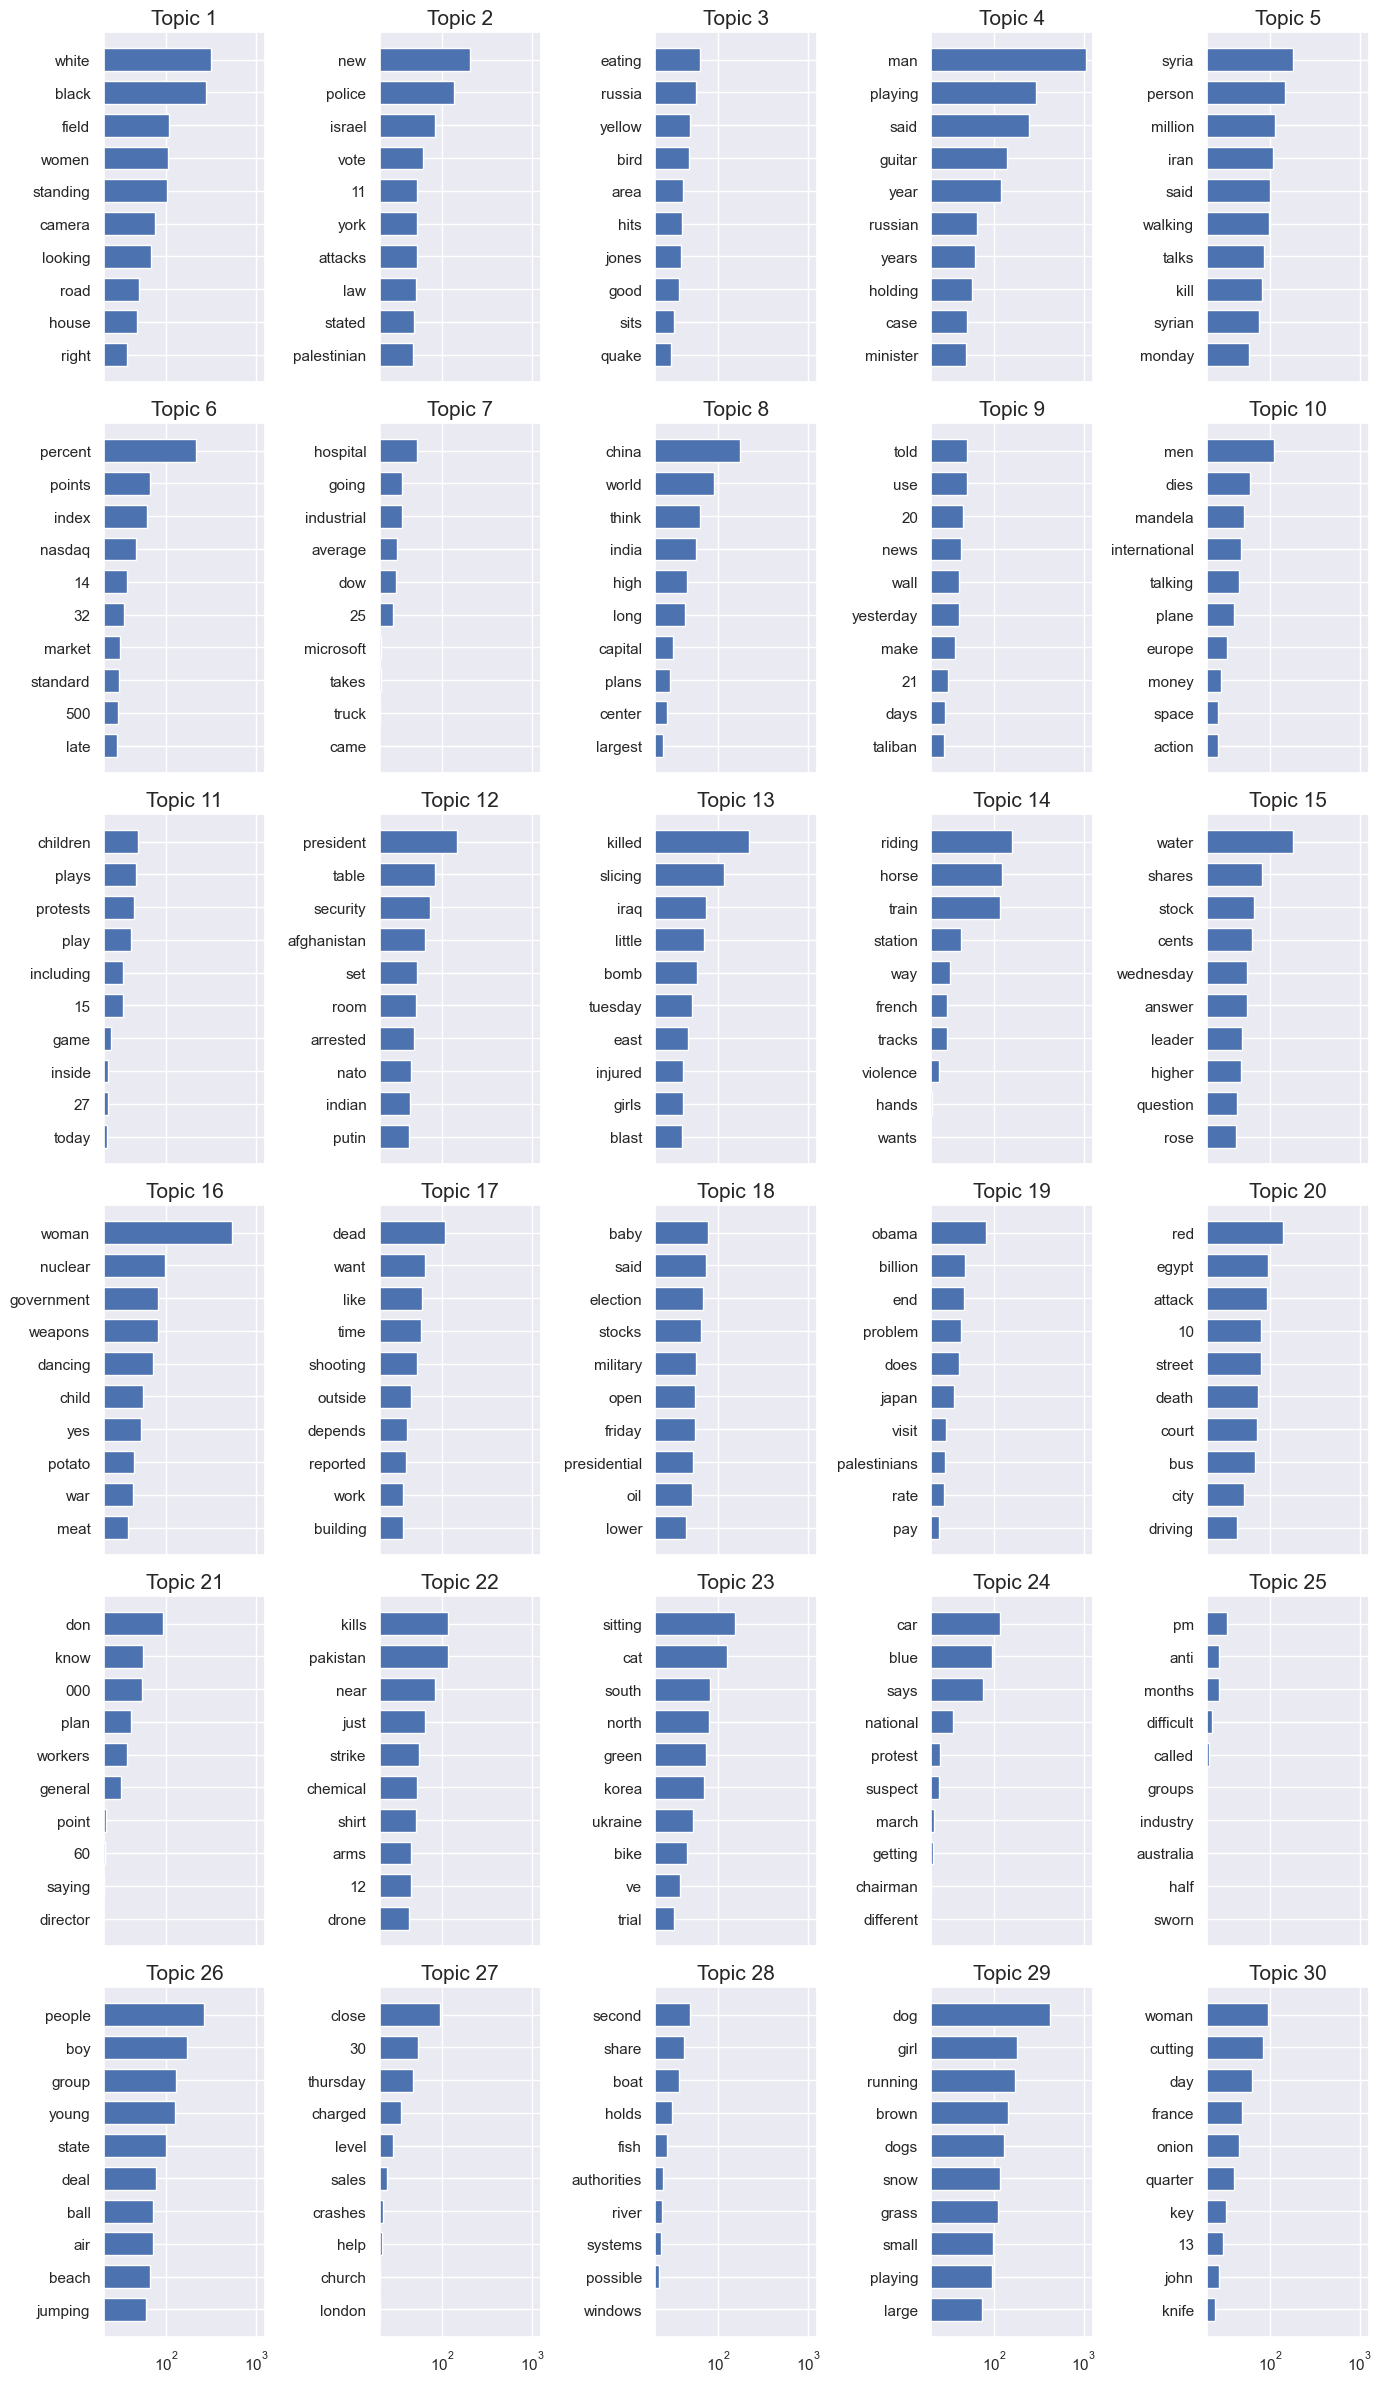

In [44]:
num_words = 10
cols = 5
rows = int(len(lda.components_)/5)

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_terms_index = topic.argsort()[:-num_words - 1:-1]
    top_terms = [tp_vocab[i] for i in top_terms_index]
    weights = topic[top_terms_index]
    ax = axes[topic_idx]
    ax.barh(top_terms, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',fontdict={'fontsize': 15})
    ax.invert_yaxis()
    ax.set_xscale('log')

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.tight_layout()
plt.show()

Using TSNE to reduce dimensionality:

In [45]:
from sklearn.manifold import TSNE

tsne_embedding = TSNE(n_components=3).fit_transform(lda.transform(tp_vector_sentences_test))
tsne_embedding.shape

(6903, 3)

In [46]:
[x, y, z] = np.transpose(tsne_embedding)

Plot colored on genre:

In [58]:
fig = px.scatter_3d(x=x, y=y, z=z, color=LabelEncoder().fit_transform(tp_label_test))
fig.update_traces(marker={'size': 3,'line': {'width': 2}})

Plot colored on the learned topics:

In [57]:
freq_topic = [topic_vec.argsort()[-1] for topic_vec in lda.transform(tp_vector_sentences_test)]

fig = px.scatter_3d(x=x, y=y, z=z, color=freq_topic)
fig.update_traces(marker={'size': 3,'line': {'width': 2}})

# 2. Training Models

# 3. Extensions